<a href="https://colab.research.google.com/github/JamilePolycarpo/MachineLearning-Printer3D-Failer/blob/main/Yolov8n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytube
!pip install roboflow
!pip install ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import torch
import os
import pandas as pd

In [ ]:
rf = Roboflow(api_key="rvUKE42pZxMtA2T76aCW")
project = rf.workspace("3d-printing-failure").project("spaghetti-3d")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.42, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Spaghetti-3D-1 in yolov8:: 100%|██████████| 1442/1442 [00:00<00:00, 6547.25it/s]


In [ ]:
# Configurando o arquivo data.yaml para o dataset
file_path = '/content/Spaghetti-3D-1/data.yaml'

new_content = """
names:
- spaghetti
- stringing
nc: 2
roboflow:
  license: CC BY 4.0
  project: spaghetti-3d
  url: https://universe.roboflow.com/3d-printing-failure/spaghetti-3d/dataset/1
  version: 1
  workspace: 3d-printing-failure
test: /content/Spaghetti-3D-1/test/images
train: /content/Spaghetti-3D-1/train/images
val: /content/Spaghetti-3D-1/valid/images
"""

with open(file_path, 'w') as file:
    file.write(new_content.strip())

print(f'O arquivo {file_path} foi configurado.')


O arquivo /content/Spaghetti-3D-1/data.yaml foi configurado.


In [ ]:
# Treinar modelos YOLOv8 com diferentes tamanhos
models = ['yolov8n.pt']
results = {}
epocas = 100
for model_name in models:
    model = YOLO(model_name)

    result = model.train(
        data="/content/Spaghetti-3D-1/data.yaml",
        epochs=epocas,
        imgsz=640,
        batch=128,
        lr0=0.001,
        augment=True
    )
    results[model_name] = result

# Visualizar resultados do treinamento
for model_name, result in results.items():
    print(f"Resultados para o modelo {model_name}:")
    print(result)


100%|██████████| 6.23M/6.23M [00:00<00:00, 75.3MB/s]


Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Spaghetti-3D-1/data.yaml, epochs=100, time=None, patience=100, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

train: Scanning /content/Spaghetti-3D-1/train/labels... 515 images, 0 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<00:00, 1205.20it/s]

train: New cache created: /content/Spaghetti-3D-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Spaghetti-3D-1/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 1045.16it/s]

val: New cache created: /content/Spaghetti-3D-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 196. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        17G      2.483      3.678      2.362         27        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all        100        196    0.00603      0.398     0.0111    0.00446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      17.2G      2.414      3.592      2.357         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all        100        196    0.00752      0.551     0.0417     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100        17G      2.228      3.338       2.17         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all        100        196    0.00804      0.622      0.133     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      17.2G      2.153      2.984      2.107          9        640: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all        100        196     0.0098      0.622      0.159     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      17.2G      2.196      2.749      2.096         24        640: 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all        100        196    0.00988      0.602      0.107     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      17.2G       2.05      2.752      2.073         17        640: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all        100        196     0.0135      0.612      0.107     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        17G      2.061      2.557      2.054         26        640: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all        100        196      0.106      0.449      0.154     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      17.2G      1.985      2.601      1.984         11        640: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all        100        196      0.272      0.138      0.137     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      17.1G       2.03      2.505      2.002         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all        100        196      0.206     0.0408      0.127     0.0483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        17G       2.07      2.528       2.04         27        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all        100        196      0.316     0.0867      0.094     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      17.3G      1.967       2.63      1.955          8        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all        100        196     0.0594      0.051     0.0339     0.0181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      17.1G      1.989      2.489      1.963         20        640: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all        100        196      0.203     0.0765     0.0711      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      17.2G      1.883      2.561      1.859          5        640: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all        100        196      0.228      0.102     0.0684     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      16.9G      1.967      2.297      1.927         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all        100        196     0.0526      0.102     0.0219    0.00573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      17.1G      1.904      2.393      1.948         11        640: 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all        100        196     0.0903      0.107     0.0349     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        17G      1.997       2.33      1.916         19        640: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all        100        196      0.025      0.051     0.0105    0.00328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      17.1G      1.937      2.361      1.991         20        640: 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all        100        196     0.0595     0.0765     0.0156    0.00439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      17.1G      1.951      2.345      1.937         19        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all        100        196       0.11     0.0459     0.0325    0.00883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      17.3G      2.022      2.331      1.958         20        640: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all        100        196     0.0245      0.102     0.0106    0.00314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      17.1G      1.997      2.369       2.01         13        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all        100        196     0.0918      0.133      0.027    0.00641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      17.2G      1.992      2.268      1.949         36        640: 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all        100        196     0.0563     0.0306    0.00831    0.00204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      17.2G      1.981      2.382      1.971         11        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all        100        196     0.0481     0.0408     0.0085    0.00212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      17.1G      1.964      2.327      1.948          9        640: 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all        100        196     0.0264      0.138      0.013    0.00422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        17G      1.923      2.188      1.918         31        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all        100        196     0.0267      0.117    0.00901    0.00232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      17.1G      1.894      2.187      1.885         15        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all        100        196     0.0138     0.0918    0.00642    0.00171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      17.2G      1.972      2.251       1.89          9        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all        100        196     0.0349     0.0612    0.00807    0.00216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      17.1G      1.938      2.086      1.834         27        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all        100        196     0.0183     0.0561    0.00876    0.00242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      17.2G      1.919       2.13      1.878         26        640: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all        100        196     0.0514      0.051     0.0163    0.00522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      17.1G        1.8      2.028      1.799         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all        100        196     0.0897      0.107     0.0301     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      17.2G      1.898      2.002      1.855         29        640: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all        100        196     0.0937     0.0816     0.0354      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      17.3G      1.845       2.05      1.833         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all        100        196     0.0265     0.0612    0.00792    0.00289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        17G      1.952      2.027      1.884         31        640: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all        100        196     0.0442      0.107     0.0183    0.00495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      17.2G       1.87       1.92      1.836         19        640: 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all        100        196     0.0478      0.158     0.0201    0.00634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      17.1G      1.755      1.897      1.711         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all        100        196      0.102      0.133     0.0514     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      17.2G      1.795      1.951      1.774          7        640: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all        100        196     0.0847      0.158     0.0525     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      17.2G      1.821      1.942      1.804         37        640: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all        100        196     0.0524      0.173     0.0226    0.00764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      16.9G      1.762      1.791      1.731         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all        100        196       0.11      0.153       0.04     0.0148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      17.2G      1.783      1.939      1.804          9        640: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all        100        196     0.0974      0.143     0.0576     0.0197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      17.1G      1.764      1.982       1.73          9        640: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all        100        196      0.208      0.179      0.112     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      16.9G       1.74      1.717      1.698         20        640: 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all        100        196      0.256      0.153      0.103     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      17.1G      1.711      1.647      1.693         25        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all        100        196       0.19      0.209      0.109     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      17.2G      1.776      1.794      1.723         39        640: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all        100        196      0.171      0.168     0.0729     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      17.2G      1.729      1.601      1.671         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all        100        196      0.209      0.184      0.109      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        17G      1.672      1.682      1.702         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all        100        196      0.256      0.204      0.129     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      17.1G      1.714      1.634      1.692         27        640: 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all        100        196      0.192      0.173     0.0882     0.0331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        17G      1.774       1.64      1.681         26        640: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all        100        196       0.34      0.168      0.129     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100        17G      1.689      1.537      1.653         26        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all        100        196       0.19      0.163     0.0969     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      17.1G      1.764      1.587       1.72          6        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all        100        196      0.218      0.189      0.124     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      17.1G      1.525      1.504      1.549         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all        100        196      0.214      0.163      0.106     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        17G      1.686      1.609      1.657         37        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all        100        196      0.136      0.158     0.0894     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      17.2G      1.565      1.421      1.543         11        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all        100        196      0.154      0.122     0.0639     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      17.1G      1.569      1.493      1.577          9        640: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all        100        196      0.215      0.219      0.142     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      17.2G      1.628      1.423      1.575         42        640: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all        100        196      0.158      0.204     0.0838     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      17.1G      1.617      1.425      1.563         23        640: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all        100        196      0.242       0.25       0.14      0.054



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      17.3G      1.516      1.349        1.5         28        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all        100        196      0.279       0.25      0.165     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      17.2G      1.528      1.403      1.539         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all        100        196      0.373      0.214      0.173     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      17.2G      1.641      1.599      1.577          9        640: 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all        100        196      0.346      0.224      0.171     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        17G       1.52      1.236      1.515         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all        100        196       0.41      0.168       0.15     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      17.1G      1.492      1.258      1.477         20        640: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all        100        196      0.273      0.291      0.183     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      17.2G      1.487      1.337      1.502          7        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all        100        196      0.298      0.245      0.171     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      17.1G      1.479      1.237      1.457         19        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all        100        196      0.223      0.268      0.178     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      17.1G       1.51      1.342      1.493          7        640: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all        100        196      0.328      0.265      0.228     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      17.1G       1.43      1.148      1.435         24        640: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all        100        196      0.276      0.209      0.157     0.0655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      17.1G      1.516      1.405      1.576         13        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all        100        196      0.388      0.224      0.196     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      17.1G      1.597      1.274      1.557         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all        100        196      0.398      0.235      0.184     0.0697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100        17G      1.424      1.107      1.391         12        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all        100        196      0.325       0.23      0.183     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      17.1G      1.499      1.207      1.436         25        640: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all        100        196      0.431       0.25      0.242      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      17.1G      1.468      1.143       1.44         26        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all        100        196      0.326       0.27      0.181     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      17.1G       1.43      1.047      1.398         24        640: 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all        100        196      0.263       0.25      0.182     0.0683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      17.1G      1.439      1.153      1.419         33        640: 100%|██████████| 5/5 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all        100        196      0.257      0.245      0.168     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      17.2G       1.44      1.347       1.47          8        640: 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all        100        196      0.406      0.189      0.167     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      17.1G      1.422       1.14      1.433         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all        100        196      0.335      0.214       0.18     0.0782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      17.3G      1.264      1.036      1.329         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all        100        196      0.316       0.25      0.213     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      17.1G      1.316     0.9924      1.357         25        640: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all        100        196      0.291      0.291      0.209      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      17.3G      1.377      1.036      1.433         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all        100        196      0.276      0.262      0.207     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      17.1G      1.432      1.069      1.383         13        640: 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all        100        196      0.325      0.296      0.216     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      17.1G      1.473      1.106      1.425         22        640: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all        100        196      0.284      0.265       0.21     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      17.1G      1.361      1.029      1.368         24        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all        100        196      0.383      0.214      0.224     0.0958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      17.1G      1.326      1.048      1.338         21        640: 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all        100        196      0.241      0.286      0.236      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      17.3G      1.319      1.098      1.359         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all        100        196      0.272      0.301      0.222     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      17.1G      1.312     0.9513      1.313         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all        100        196      0.286      0.327      0.222     0.0921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      17.1G       1.33     0.9599      1.315         34        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all        100        196      0.288      0.337       0.24     0.0943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100        17G      1.291      1.081      1.378         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all        100        196      0.363      0.265      0.231     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100        17G      1.351      1.139      1.404         12        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all        100        196      0.369      0.296      0.248     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      17.2G      1.207     0.8706      1.265         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all        100        196      0.332      0.332      0.253      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        17G      1.259      0.866      1.252         28        640: 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all        100        196      0.417      0.306       0.26      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      17.1G      1.234     0.9495      1.294         12        640: 100%|██████████| 5/5 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all        100        196      0.388      0.301      0.246      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      16.9G       1.17     0.8574      1.246         10        640: 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all        100        196      0.287      0.332       0.23      0.094



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100        17G      1.186      0.837      1.237         23        640: 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all        100        196      0.398      0.281      0.236     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      17.3G      1.215      0.863      1.277         30        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all        100        196      0.442       0.27      0.257     0.0989


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      16.7G      1.255     0.9845      1.355          8        640: 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all        100        196      0.412       0.27      0.237     0.0958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      16.7G      1.305     0.9086      1.334          7        640: 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all        100        196      0.332      0.276      0.215     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      16.7G      1.172     0.8862      1.246         21        640: 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all        100        196      0.283       0.27      0.204     0.0887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      16.7G      1.225     0.7928      1.267         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all        100        196      0.309      0.281      0.222     0.0932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      16.7G       1.21     0.9898      1.342         17        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all        100        196      0.346       0.27      0.223     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      16.7G      1.196     0.8318      1.257         11        640: 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all        100        196      0.351       0.27      0.237      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      16.7G      1.205     0.7963      1.218         17        640: 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all        100        196      0.352      0.265      0.238      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      16.7G     0.9586     0.9038      1.165          3        640: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all        100        196      0.283      0.316      0.238      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      16.7G      1.244     0.9464      1.247         12        640: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all        100        196       0.32      0.296      0.238      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      16.7G      1.136      0.781      1.236         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all        100        196      0.411       0.24      0.241      0.104



100 epochs completed in 0.079 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]


                   all        100        196      0.438      0.357      0.284      0.119
             spaghetti        100        196      0.438      0.357      0.284      0.119
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train
Resultados para o modelo yolov8n.pt:
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c67be38db10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
       

In [ ]:
# Começa com train no primeiro treino e depois train2,train3... essa informação aparece na saida do codigo anterior "Results saved to runs/detect/train"
treino_atual = "train"

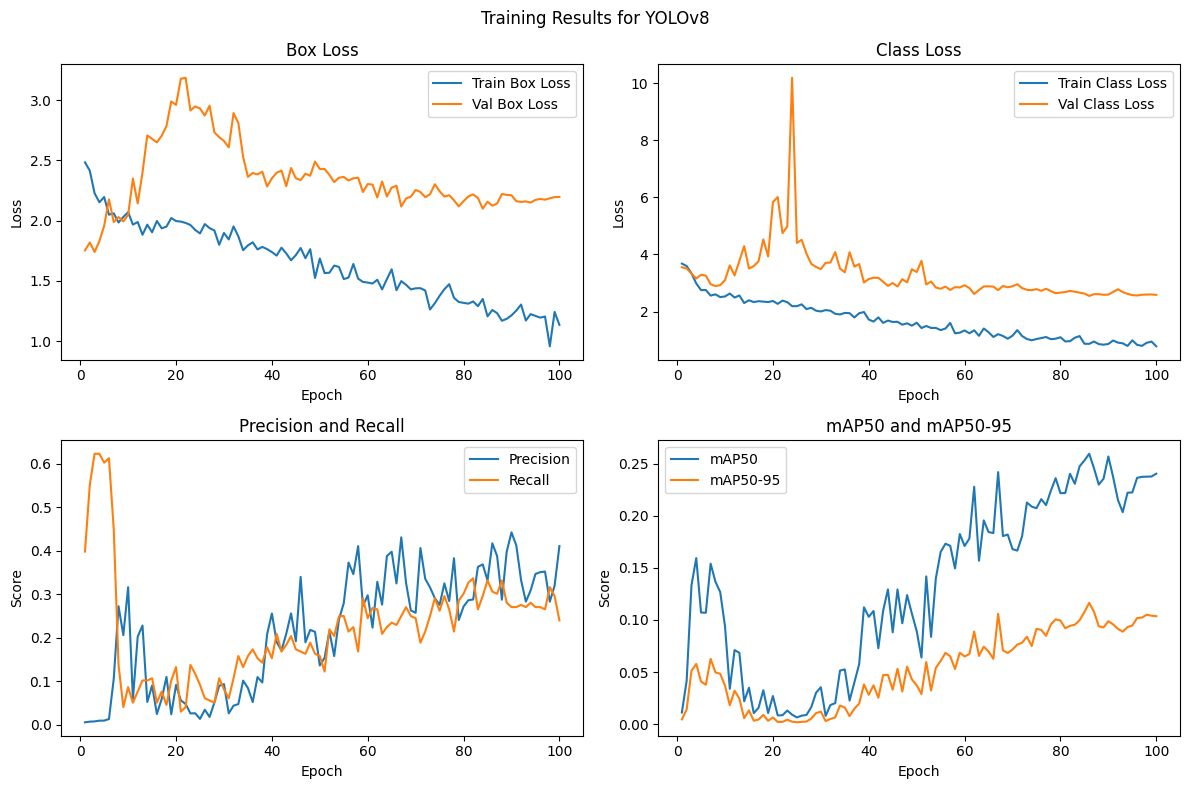

In [ ]:
# Graficos
%matplotlib inline

# Carregar o arquivo CSV
file_path = f'/content/runs/detect/{treino_atual}/results.csv'
training_data = pd.read_csv(file_path)
training_data.head()
# Remover espaços em branco nos nomes das colunas
training_data.columns = training_data.columns.str.strip()

# Função para plotar os dados de treino
def plot_training_results(data, title):
    plt.figure(figsize=(12, 8))

    # Plotando Box Loss
    plt.subplot(2, 2, 1)
    plt.plot(data['epoch'], data['train/box_loss'], label='Train Box Loss')
    plt.plot(data['epoch'], data['val/box_loss'], label='Val Box Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Box Loss')
    plt.legend()

    # Plotando Class Loss
    plt.subplot(2, 2, 2)
    plt.plot(data['epoch'], data['train/cls_loss'], label='Train Class Loss')
    plt.plot(data['epoch'], data['val/cls_loss'], label='Val Class Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Class Loss')
    plt.legend()

    # Plotando Precision e Recall
    plt.subplot(2, 2, 3)
    plt.plot(data['epoch'], data['metrics/precision(B)'], label='Precision')
    plt.plot(data['epoch'], data['metrics/recall(B)'], label='Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title('Precision and Recall')
    plt.legend()

    # Plotando mAP50 e mAP50-95
    plt.subplot(2, 2, 4)
    plt.plot(data['epoch'], data['metrics/mAP50(B)'], label='mAP50')
    plt.plot(data['epoch'], data['metrics/mAP50-95(B)'], label='mAP50-95')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title('mAP50 and mAP50-95')
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plotar os resultados do treinamento
plot_training_results(training_data, 'Training Results for YOLOv8')



image 1/1 /content/Spaghetti-3D-1/valid/images/imag-53-_jpg.rf.67f6b36ab64eac6c76e7048e282a12bb.jpg: 640x640 1 spaghetti, 7.2ms
Speed: 2.0ms preprocess, 7.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


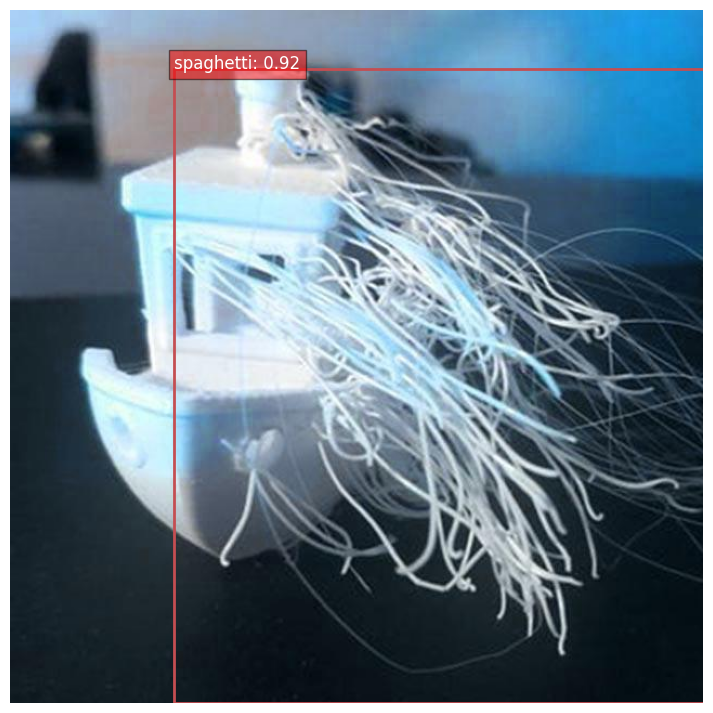

In [ ]:
# Testando em uma unica imagem
def preprocess_image(image, target_size):
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Carrega o modelo treinado
model = YOLO(f"/content/runs/detect/{treino_atual}/weights/best.pt")

# Carrega uma unica imagem para testar
image_path = "/content/Spaghetti-3D-1/valid/images/imag-53-_jpg.rf.67f6b36ab64eac6c76e7048e282a12bb.jpg"
image = Image.open(image_path)

results = model(image_path)[0]

boxes = results.boxes
detections = boxes.xyxy.cpu().numpy()
confidences = boxes.conf.cpu().numpy()
class_ids = boxes.cls.cpu().numpy()
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

for detection, conf, class_id in zip(detections, confidences, class_ids):
    x1, y1, x2, y2 = detection
    rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{model.names[int(class_id)]}: {conf:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.show()


In [ ]:
# Transforma a detecção em um dataframe e salva no detection_results.csv
def preprocess_image(image, target_size):
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Carrega modelo YOLOv8 treinado
model = YOLO(f"/content/runs/detect/{treino_atual}/weights/best.pt")

image_dir = "/content/Spaghetti-3D-1/valid/images"
detection_results = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Add other image formats if needed
        image_path = os.path.join(image_dir, filename)
        image = Image.open(image_path)
        results = model(image_path)[0]

        boxes = results.boxes
        detections = boxes.xyxy.cpu().numpy()
        confidences = boxes.conf.cpu().numpy()
        class_ids = boxes.cls.cpu().numpy()

        # Prepara os dados se detectar
        for detection, conf, class_id in zip(detections, confidences, class_ids):
            detection_results.append({
                'filename': filename,
                'detected': True,
                'confidence': conf,
                'class_id': class_id,
                'class_name': model.names[int(class_id)]
            })

        # Caso não seja detectado
        if len(detections) == 0:
            detection_results.append({
                'filename': filename,
                'detected': False,
                'confidence': None,
                'class_id': None,
                'class_name': None
            })

# Converte os resultados em um dataframe
df = pd.DataFrame(detection_results)
df.to_csv("detection_results.csv", index=False)



image 1/1 /content/Spaghetti-3D-1/valid/images/imag-97-_jpg.rf.14c45942de40a1234c4d593214f74dae.jpg: 640x640 2 spaghettis, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Spaghetti-3D-1/valid/images/imag-56-_jpg.rf.7cc129c7e0bb897b3375e6287338a883.jpg: 640x640 1 spaghetti, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Spaghetti-3D-1/valid/images/imag-92-_jpg.rf.30e6e4c373dea3cd796e2d643c79191e.jpg: 640x640 1 spaghetti, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Spaghetti-3D-1/valid/images/imag-71-_jpg.rf.3ecb77996321dd533a476af9900a2830.jpg: 640x640 1 spaghetti, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Spaghetti-3D-1/valid/images/imag-80-_jpg.rf.a24b11cef403ee60c3f78995a599fc04.jp

In [ ]:
# Mostrando quantos foram detectados
df = pd.read_csv("detection_results.csv")
detection_counts = df['detected'].value_counts()
print(detection_counts)


detected
True     154
False     15
Name: count, dtype: int64


In [ ]:
# Passa o modelo treinado em todas as imagens
def preprocess_image(image, target_size):
    image = image.resize(target_size)
    image = np.array(image) / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)
    return image

# Carrega o modelo YOLOv8 treinado
model = YOLO(f"/content/runs/detect/{treino_atual}/weights/best.pt")

image_dir = "/content/Spaghetti-3D-1/valid/images"
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_dir, filename)
        image = Image.open(image_path)

        results = model(image_path)[0]

        boxes = results.boxes
        detections = boxes.xyxy.cpu().numpy()
        confidences = boxes.conf.cpu().numpy()
        class_ids = boxes.cls.cpu().numpy()

        fig, ax = plt.subplots(1, figsize=(12, 9))
        ax.imshow(image)

        for detection, conf, class_id in zip(detections, confidences, class_ids):
            x1, y1, x2, y2 = detection
            rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.text(x1, y1, f'{model.names[int(class_id)]}: {conf:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

        plt.axis('off')
        plt.title(f"Detections for {filename}")
        plt.show()
